<a href="https://colab.research.google.com/github/sznajder/ON-Minicurso-2022/blob/main/MLP_MNIST_Keras_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JUPYTER NOTEBOOK FOR A MLP with SOFTMAX output 
LEARNING MNIST NUMBERS from 0 to 9**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

**Define the network hyperparameters**

In [ ]:
# Trainign batch size 
batch_size = 64
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1
# Dropout rate
drop=0.1

**Load the MNIST dataset and format it for train and validation**

In [ ]:
# Load MNIST dataset (28x28 pixel images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("y_train=",y_train)
Y_Train = utils.to_categorical(y_train, nb_classes)
print("Y_Train=",Y_Train)
Y_Test = utils.to_categorical(y_test, nb_classes)


y_train= [5 0 4 ... 5 6 8]
Y_Train= [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


**Define the MLP achitecture using KERAS sequential API**

In [ ]:
# Multilayer Perceptron model
model = Sequential()
# Input layer
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dropout(drop))
# Hidden layers
hidden_nodes = {1:50,2:25}
#hidden_nodes = {1:50,2:50,3:50,4:50,5:50,6:50,7:50} 
for nhid in hidden_nodes.values():
  model.add(Dense(activation="relu", units=int(nhid), kernel_initializer="normal")) # after first layer no need to specify input_dim
  model.add(Dropout(drop))
# Output layer
model.add(Dense(activation="softmax", units=10, kernel_initializer="normal"))
# Compile and print model
model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Train the MLP**

In [ ]:
# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=1)


Epoch 1/50
657/657 [==============================] - 5s 4ms/step - loss: 1.3868 - accuracy: 0.5079 - val_loss: 0.4893 - val_accuracy: 0.8564
Epoch 2/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4080 - accuracy: 0.8805 - val_loss: 0.3231 - val_accuracy: 0.9049
Epoch 3/50
657/657 [==============================] - 2s 4ms/step - loss: 0.2561 - accuracy: 0.9267 - val_loss: 0.2601 - val_accuracy: 0.9182
Epoch 4/50
657/657 [==============================] - 2s 4ms/step - loss: 0.2001 - accuracy: 0.9423 - val_loss: 0.1541 - val_accuracy: 0.9557
Epoch 5/50
657/657 [==============================] - 2s 4ms/step - loss: 0.1614 - accuracy: 0.9528 - val_loss: 0.1505 - val_accuracy: 0.9539
Epoch 6/50
657/657 [==============================] - 2s 4ms/step - loss: 0.1393 - accuracy: 0.9591 - val_loss: 0.1330 - val_accuracy: 0.9618
Epoch 7/50
657/657 [==============================] - 2s 4ms/step - loss: 0.1231 - accuracy: 0.9629 - val_loss: 0.1410 - val_accuracy: 0.9593
Epoch 

**Evaluate the MLP performance**

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9786
Summary: Loss over the test dataset: 0.11, Accuracy: 0.98


**Plot the training and validation performances**

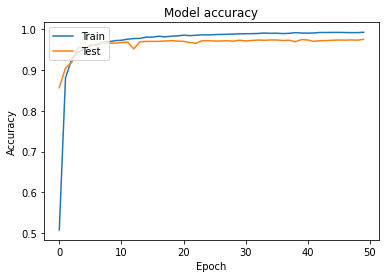

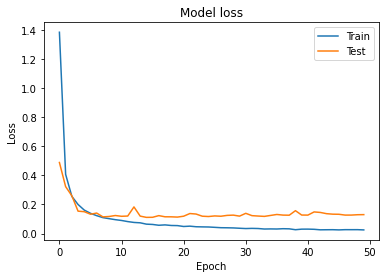

In [ ]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(10000, 10)


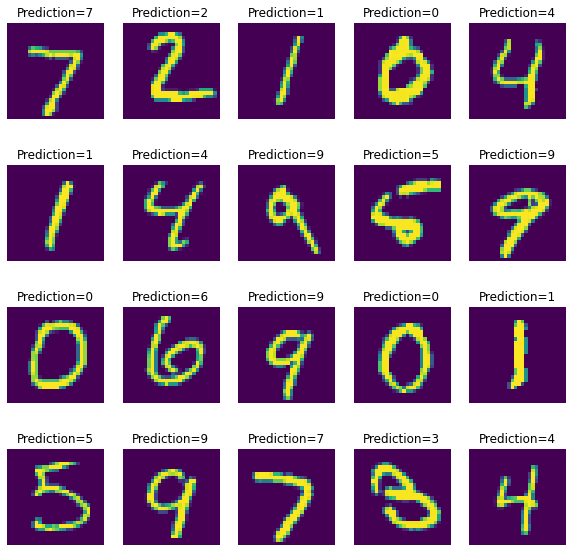

In [ ]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()

**Exercises:**

---


**Question 1**: What happens if you increase/decrease the number of hidden layers?


**Question 2:** What happens if you increase/decrease the number of nodes per hidden layer?

**Question 3:** What happens if you increase/decrease the learning rate ?

**Question 4:** What happens if you increase/decrease the number of training epochs  ?

**Question 5:** What happens if you increase/decrease the training batch size ?

**Question 6:** What happens if you use the ReLU activation function in the hidden layers ?